What factors affect how much customers will pay for netflix ?

fixing error 2, no file or directory found. the reasopn this occurs is to find the current working directory of the python file youre working on. The main way to fix this is to find the cwd (current working directory) of the file, then fixing the file path from that

1. fixing the error [2] in directory

In [1]:
#step 1. Load the file (whatever it might csv, json) into jupyter or whatever notebook youree working on, then find the file path
fielpath = 'RTC:GIA project/1. Correlation analysis/netflix_customer_churn.csv' #running this filepath will give you an nerror 2, wehre you cannot find the directory
#step 2. import os to find the cwd(curreent working directory)
import os 
print(os.getcwd()) #this gives the filepath /home/jovyan/GIA project/1. Correlation analysis. Thenn after the correlation analysis part of the streing, we add the excel file path
final_excel_filepath = '/home/jovyan/GIA project/1. Correlation analysis/netflix_customer_churn.csv'
open(final_excel_filepath)

/home/jovyan/GIA project/1. Correlation analysis


<_io.TextIOWrapper name='/home/jovyan/GIA project/1. Correlation analysis/netflix_customer_churn.csv' mode='r' encoding='UTF-8'>

2. importing libraries neccesary

In [2]:
#importing the libraries
import pandas as pd #used for data manipulation
import seaborn as sns # used as an addin for matplotlib for heastmaps and other interesting paths
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
plt.style.use('ggplot') #plot style
from matplotlib.pyplot import figure

#read in data-include r infront of the filepath to make python think of the string literally

# df.read_csv produces an error as we havent used the pandas module to read the data

df = pd.read_csv('/home/jovyan/GIA project/1. Correlation analysis/netflix_customer_churn.csv') # for first attempt read on how to use pandas

2. Messing around with pandas

In [4]:
df.head() #gives the first 5 rows if no argumenbt is given, but an argument n = 7 prints the seven rows
df.tail() #gives the last 5 rows 
sorted_data_age = df.sort_values(by='watch_hours', ascending = False)  #sorts by most watching hours
sub_type = df['subscription_type']
#print(sub_type.head()) #only prints subscription type column
#sorting by only columns you want
watch_hours_sub_type = df[['watch_hours','monthly_fee' ]]
print(watch_hours_sub_type)

#now lets sort them by ascending watch hours
watch_hours_sub_type_ascendingwtch = watch_hours_sub_type.sort_values('watch_hours', ascending = True)
#print(watch_hours_sub_type_ascendingwtch.tail())
#no insights are found, the same methods can be found using tail()
#to derive some spread, we can use describe.(percentiles = , include = , exclude = )
#print(df.describe())
#finding specific percentiles 
percentile = [0.2, 0.5, 0.7, 0.99] #stores the needed percentiles 
#print(df.describe(percentiles = percentile))

      watch_hours  monthly_fee
0           14.73         8.99
1            0.70        13.99
2           16.32        13.99
3            4.51        17.99
4            1.89        13.99
...           ...          ...
4995        49.17         8.99
4996         9.24         8.99
4997        16.55        13.99
4998         9.12         8.99
4999         1.62         8.99

[5000 rows x 2 columns]


In [5]:
#here we can see the dataframe to inspect any n/a values
df.isna().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

3. Data cleaning 

In [6]:
# to see missing data
for i in df.columns:
    pct_missing = np.mean(df[i].isnull())
    print(f'{i}-{pct_missing}') #answer in f string since i parses through the columns

customer_id-0.0
age-0.0
gender-0.0
subscription_type-0.0
watch_hours-0.0
last_login_days-0.0
region-0.0
device-0.0
monthly_fee-0.0
churned-0.0
payment_method-0.0
number_of_profiles-0.0
avg_watch_time_per_day-0.0
favorite_genre-0.0


In [7]:
#checking data types. nKeep this for future reference
df.describe()


,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [8]:
age_df = df.sort_values(by = ['age'], ascending = True)
age_df.head(n=20) #sorted by ascending order of age

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
3147,3cb37e51-569d-4238-9854-5e659abf16c4,18,Female,Premium,0.82,59,South America,Tablet,17.99,1,PayPal,3,0.01,Action
3163,3bca6390-0c4b-4f47-a993-8e49139361c3,18,Female,Standard,2.26,48,Africa,Desktop,13.99,1,PayPal,1,0.05,Action
4825,95fb8941-2b7c-429c-a1d6-d142fcebae4b,18,Female,Standard,1.59,10,South America,Desktop,13.99,1,Gift Card,3,0.14,Documentary
4826,d0eea795-1f4e-4edb-9bd6-d37816cef777,18,Female,Standard,1.48,27,Europe,Desktop,13.99,0,Debit Card,4,0.05,Sci-Fi
4828,21a219c6-4cd0-4da5-aea7-20e42999e21a,18,Other,Basic,12.33,22,North America,Tablet,8.99,0,PayPal,5,0.54,Comedy
80,fdf130c6-cd3c-434b-abbf-4645c8ca928d,18,Male,Standard,3.56,23,Oceania,Tablet,13.99,0,Debit Card,4,0.15,Horror
1427,1b43ab83-77a5-4a8f-b68c-bbb2d21d310f,18,Female,Standard,2.14,44,North America,Desktop,13.99,1,Gift Card,3,0.05,Comedy
158,8af34fa6-55d3-4e2f-bb67-94d27ba89512,18,Other,Standard,16.81,56,Oceania,Tablet,13.99,1,Credit Card,2,0.29,Drama
2586,2f55007a-9682-4109-8431-2fa060e85673,18,Female,Standard,0.25,37,Africa,Laptop,13.99,1,Debit Card,5,0.01,Sci-Fi
4500,e623d359-0278-4bfc-82c3-86892eed77a3,18,Male,Standard,3.49,54,Oceania,Laptop,13.99,1,Crypto,3,0.06,Sci-Fi


In [9]:
#Age will have a hiher correlation, watch time maybe as well, maybe monthly_fee

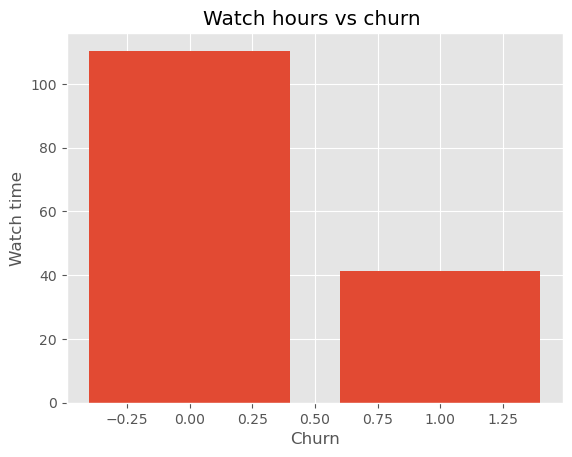

In [10]:
#scatter plot with age and churn 
plt.bar(x=df['churned'], height = df['watch_hours'])
plt.xlabel('Churn')
plt.ylabel('Watch time')
plt.title('Watch hours vs churn ')
plt.show()

stopped at churn analysis, searhc medium for blogs

In [11]:
#encoding gender, subscription type, payment_method, favorite_genre, 
df_gender_encoded = LabelEncoder().fit_transform(df.gender.values)#encodes gender by using scikit learn through using the attribute fit_transform 0=female, 1 = male, 2 = other
df['gender_encoded']=df_gender_encoded #THe column gender_encoded is added

df_subscription_encoded = LabelEncoder().fit_transform(df.subscription_type.values) #0 = basic, standard = 2, 1 = premium
df['subscription_encoded'] = df_subscription_encoded #does the same thing as gender encoded

df_payment_encoded = LabelEncoder().fit_transform(df.payment_method.values)# 3 = giftcard, 1= crypto, 2 = debit card,  4 = paypal
df['payment_meth_encoded']=df_payment_encoded

df_favgenre_encoded = LabelEncoder().fit_transform(df.favorite_genre)
df['favgenre_encoded']=df_favgenre_encoded


df_region_encoded = LabelEncoder().fit_transform(df.region)
df['region_encoded'] = df_region_encoded

df_device_encoded= LabelEncoder().fit_transform(df.device)
df['device_encoded'] = df_device_encoded

df_payments_encoded = LabelEncoder().fit_transform(df.monthly_fee)
df['fee_encoded'] = df_device_encoded

df


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,...,number_of_profiles,avg_watch_time_per_day,favorite_genre,gender_encoded,subscription_encoded,payment_meth_encoded,favgenre_encoded,region_encoded,device_encoded,fee_encoded
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,...,1,0.49,Action,2,0,3,0,0,3,3
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,...,5,0.03,Sci-Fi,2,2,3,6,2,2,2
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,...,2,1.48,Drama,0,2,1,3,1,3,3
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,...,2,0.35,Horror,2,1,1,4,4,3,3
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,...,2,0.13,Action,2,2,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,...,4,4.10,Drama,0,0,0,3,2,0,0
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,...,3,3.08,Documentary,0,0,4,2,3,0,0
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,...,2,0.33,Action,1,2,2,0,5,0,0
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,...,4,2.28,Sci-Fi,0,0,0,6,2,1,1


<Axes: xlabel='watch_hours', ylabel='last_login_days'>

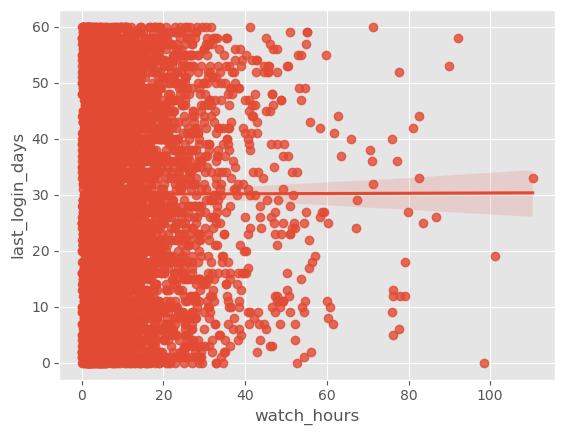

In [12]:
#plotting watch hours vs churn using seaborn # 
sns.regplot(x = 'watch_hours', y = 'last_login_days', data = df)



In [13]:
 #use a helper column, its a lot easier than replacing a column. It also keeps a record on the ecoding done  

In [14]:
# Looking at correlation
#Looking at correlation between only selected columns
#df_corr = df[[[[[[[[[[['churned', 'gender_encoded', 	'subscription_encoded', 'payment_encoded', 'favgenre_encoded',	'payment_meth_encoded', 	'subscriptiontyp_encoded', 	'region_encoded', 'device_encoded', 	'fee_encoded']]]]]]]]]]]
#print(df_corr)
df_corr = df.get(['churned', 'gender_encoded', 	'subscription_encoded', 'payment_encoded', 'favgenre_encoded', 	'subscriptiontyp_encoded', 	'region_encoded', 'devicch_houre_encoded', 	'fee_encoded', 'wats'])
df_corr.corr()


AttributeError: 'NoneType' object has no attribute 'corr'

In [ ]:

df_corr.head(n=100)